In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.linear_model import LinearRegression

### Import Dataset dan Membaca Dataset

In [4]:
df = pd.read_csv('Downloads/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## A. Supervised Learning

###  Menggunakan KNearestNeighbour (KNN)

In [5]:
X = df[['population', 'suicides_no']] 
y = df['sex'] 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [8]:
KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=7)

In [9]:
y_pred = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred)
class_report_knn = classification_report(y_test, y_pred)


## A2. Hasil prediksi

### Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

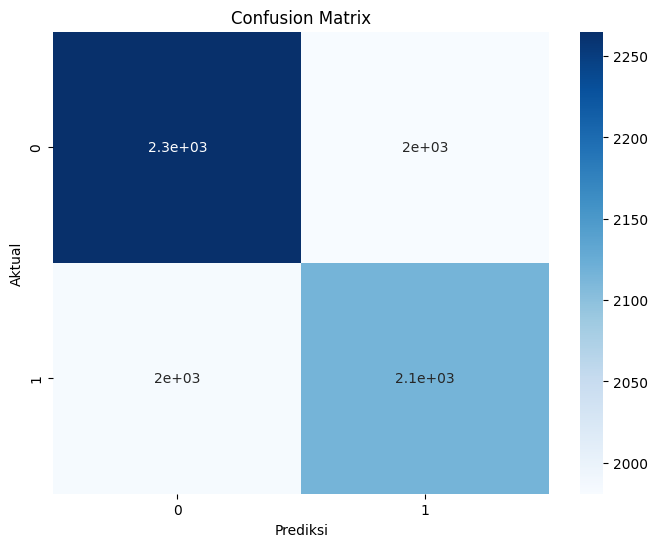

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.53      0.53      0.53      4246
        male       0.52      0.52      0.52      4100

    accuracy                           0.52      8346
   macro avg       0.52      0.52      0.52      8346
weighted avg       0.52      0.52      0.52      8346



## A3. Plotting hasil prediksi

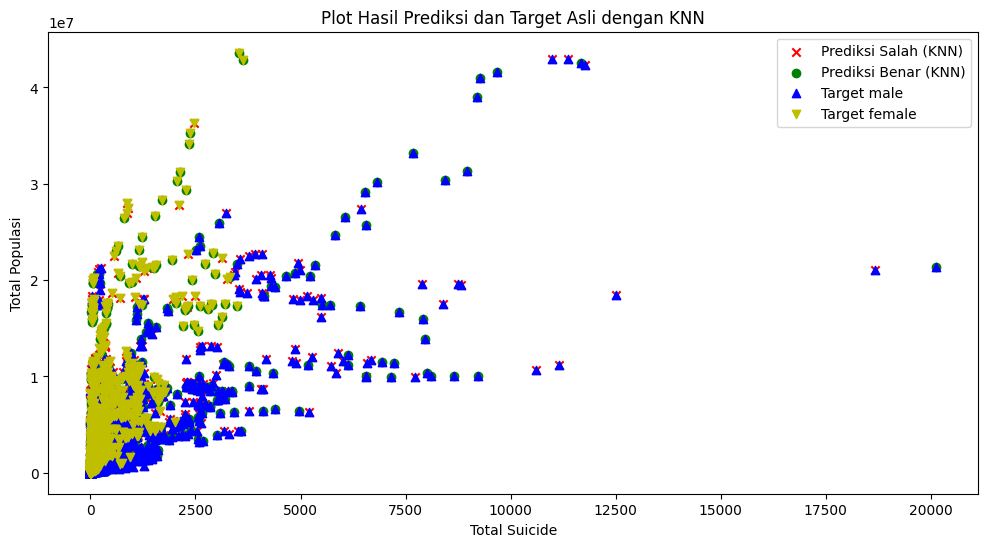

In [13]:
plt.figure(figsize=(12, 6))

# Titik-titik hasil prediksi KNN dengan warna berbeda (hijau untuk benar, merah untuk salah)
plt.scatter(X_test[y_pred == 'male']['suicides_no'], X_test[y_pred == 'male']['population'], c='r', marker='x', label='Prediksi Salah (KNN)')

plt.scatter(X_test[y_pred == 'female']['suicides_no'], X_test[y_pred == 'female']['population'], c='g', marker='o', label='Prediksi Benar (KNN)')

plt.scatter(X_test[y_test == 'male']['suicides_no'], X_test[y_test == 'male']['population'], c='b', marker='^', label='Target male')

plt.scatter(X_test[y_test == 'female']['suicides_no'], X_test[y_test == 'female']['population'], c='y', marker='v', label='Target female')

plt.xlabel('Total Suicide')
plt.ylabel('Total Populasi')
plt.title('Plot Hasil Prediksi dan Target Asli dengan KNN')
plt.legend(loc='best')
plt.show()

## B. Unsupervised Learning

### B1. Implementasikan metode K-Means 

In [28]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [29]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

In [36]:
# Silhouette Score
ss_score = silhouette_score(X, df['cluster'])
print(f"Silhouette Score: {ss_score:.2f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, df['cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, df['cluster'])
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.86
Davies-Bouldin Index: 0.46
Calinski-Harabasz Index: 57001.33


### B2. Cluster yang telah diprediksi

In [47]:
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df["cluster"], df["suicides_no"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df["suicides_no"], df['cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(df['suicides_no'], df['cluster'])
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# Fungsi HCV-M
homogeneity = homogeneity_score(df["suicides_no"], df['cluster'])
completeness = completeness_score(df["suicides_no"], df['cluster'])
v_measure = v_measure_score(df["suicides_no"], df['cluster'])
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
suicides_no  0      1      2      3      4      5      6      7      8      \
cluster                                                                      
0                4      0      0      0      0      0      1      1      1   
1             4277   1539   1102    867    696    538    466    428    364   

suicides_no  9      ...  18681  18973  20119  20256  20562  20705  21063  \
cluster             ...                                                    
0                0  ...      1      1      1      1      1      1      1   
1              349  ...      0      0      0      0      0      0      0   

suicides_no  21262  21706  22338  
cluster                           
0                1      1      1  
1                0      0      0  

[2 rows x 2084 columns] 

Adjusted Rand Index (ARI): 0.01
Normalized Mutual Information (NMI): 0.05
Homogeneity Score: 0.03
Completeness Score: 0.61
V-Measure Score: 0.05


### B3. Buat plot untuk hasil clustering

TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

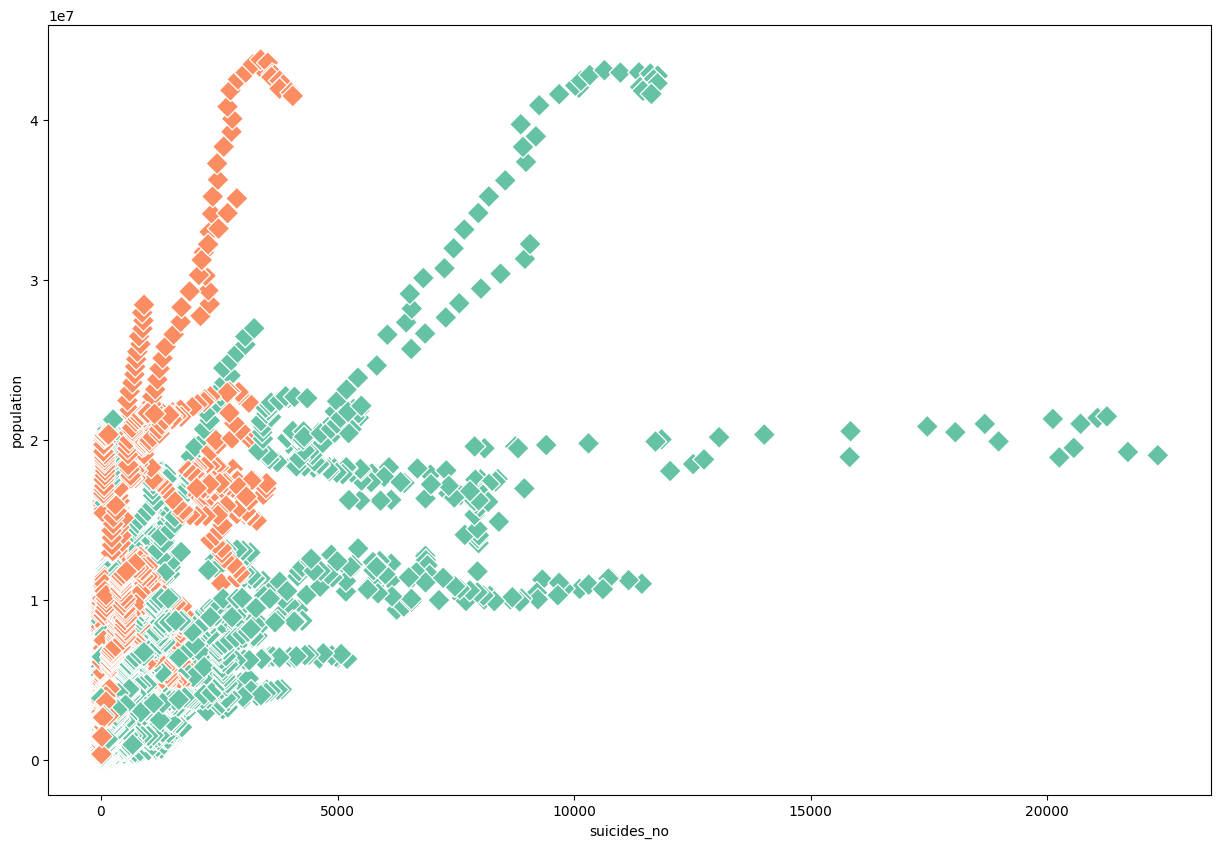

In [15]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="suicides_no", y="population", hue="sex", palette='Set2', marker="D", s=130, label="True Labels")
sns.scatterplot(data=df, x="suicides_no", y="population", hue="cluster", palette='Set2', marker="o", s=40, label="Clusters")
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100, label='Centroids')
plt.title(f"K-Means Clustering (K={k}) dengan Centroids")
plt.xlabel("Lead Time")
plt.ylabel("Average Price per Room")
plt.legend(title="Legend", loc="upper right")
plt.show()